In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import data

In [5]:
auctions = pd.read_csv("/Users/rominagoodarzi/Desktop/web_scraping/Data.csv")
print(auctions.head())
print(auctions.info())


   price  opening_price  shipping_fee  saturday  d_donation
0  41.00           9.99         10.00         0           1
1  41.98          41.98          4.40         0           0
2  35.00          29.99         10.00         0           0
3  21.95          21.95          6.70         0           0
4  20.50           9.99          4.95         0           1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2433 entries, 0 to 2432
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          2433 non-null   float64
 1   opening_price  2183 non-null   float64
 2   shipping_fee   2433 non-null   float64
 3   saturday       2433 non-null   int64  
 4   d_donation     2433 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 95.2 KB
None


# Data summary and exploration

In [6]:
print(auctions.describe())
print(auctions['d_donation'].value_counts())
print(auctions['saturday'].value_counts())

             price  opening_price  shipping_fee     saturday   d_donation
count  2433.000000    2183.000000   2433.000000  2433.000000  2433.000000
mean     88.336963      37.522025      9.402339     0.108919     0.297164
std     139.312131      89.981407      7.312428     0.311602     0.457103
min       2.000000       0.010000      0.000000     0.000000     0.000000
25%      20.500000       1.000000      4.950000     0.000000     0.000000
50%      41.000000       9.990000      7.990000     0.000000     0.000000
75%      91.090000      29.990000     12.500000     0.000000     1.000000
max    1375.000000    1100.000000     67.500000     1.000000     1.000000
0    1710
1     723
Name: d_donation, dtype: int64
0    2168
1     265
Name: saturday, dtype: int64


# Correlation analysis and visualization

                  price  opening_price  shipping_fee  saturday  d_donation
price          1.000000       0.641549      0.486483 -0.016684    0.024833
opening_price  0.641549       1.000000      0.296845 -0.008860    0.021927
shipping_fee   0.486483       0.296845      1.000000 -0.018482   -0.060456
saturday      -0.016684      -0.008860     -0.018482  1.000000   -0.071445
d_donation     0.024833       0.021927     -0.060456 -0.071445    1.000000


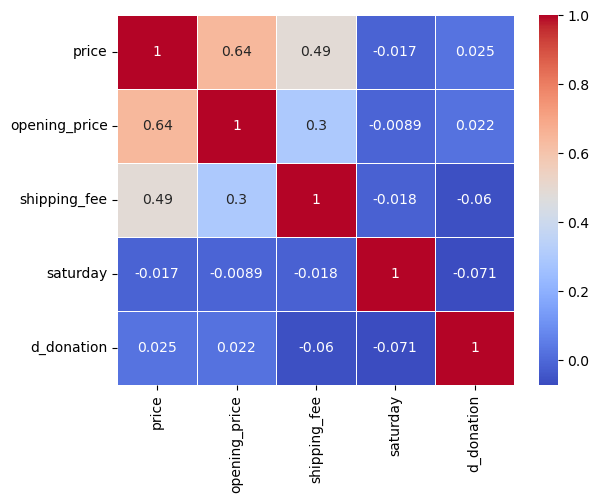

In [7]:
M = auctions.corr(method='pearson')
print(M)
sns.heatmap(M, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Linear regression

In [25]:
# Create interaction term
auctions['saturday_d_donation_interaction'] = auctions['saturday'] * auctions['d_donation']

# Fit the model
f1 = sm.OLS(auctions['price'], sm.add_constant(auctions[['saturday', 'd_donation', 'saturday_d_donation_interaction']])).fit()
print(f1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.342
Date:                Wed, 20 Mar 2024   Prob (F-statistic):             0.0714
Time:                        23:09:27   Log-Likelihood:                -13916.
No. Observations:                2183   AIC:                         2.784e+04
Df Residuals:                    2179   BIC:                         2.786e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# Adding opening price and squared term

In [9]:
#Create the DataFrame df1
df1 = auctions.copy()
df1['o_price_squared'] = df1['opening_price'] ** 2

# Replace infinite values with NaN and drop rows with missing values
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)

# Fit the model
f2 = sm.OLS(df1['price'], sm.add_constant(df1[['saturday', 'd_donation', 'opening_price', 'o_price_squared', 'saturday_d_donation_interaction']])).fit()
print(f2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     311.7
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          3.95e-252
Time:                        22:52:03   Log-Likelihood:                -13330.
No. Observations:                2183   AIC:                         2.667e+04
Df Residuals:                    2177   BIC:                         2.671e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# Plotting predicted values

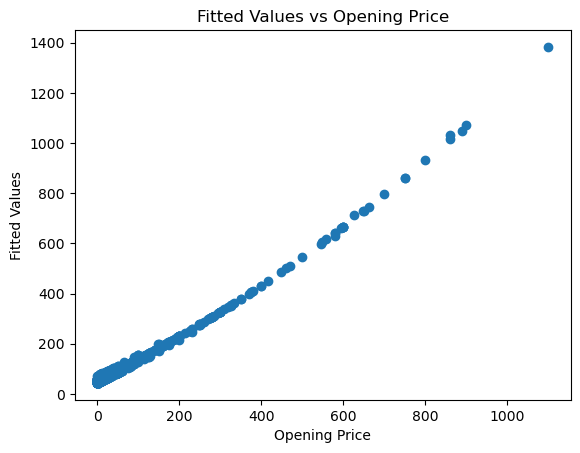

In [32]:
# Plot fitted values against 'opening_price' from df1

plt.scatter(df1['opening_price'], f2.fittedvalues)
plt.xlabel('Opening Price')
plt.ylabel('Fitted Values')
plt.title('Fitted Values vs Opening Price')
plt.show()

# Multiple linear regression

In [24]:
# Check for missing or infinite values in the DataFrame
print(auctions.isnull().sum())
print(auctions.isin([np.inf, -np.inf]).sum())

# Replace infinite values with NaN
auctions.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with missing values
auctions.dropna(inplace=True)

# Fit the model after handling missing or infinite values
f3 = sm.OLS(auctions['price'], sm.add_constant(auctions[['d_donation', 'opening_price', 'shipping_fee', 'saturday_d_donation_interaction']])).fit()
print(f3.summary())

price                              0
opening_price                      0
shipping_fee                       0
saturday                           0
d_donation                         0
saturday_d_donation_interaction    0
dtype: int64
price                              0
opening_price                      0
shipping_fee                       0
saturday                           0
d_donation                         0
saturday_d_donation_interaction    0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     586.8
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:09:03   Log-Likelihood:                -13121.
No. Observations:                2183   AIC:            

# Price distribution analysis

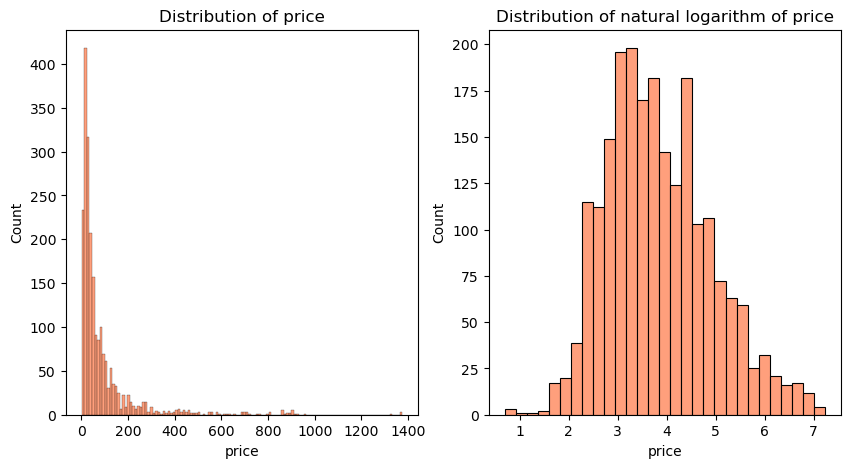

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(auctions['price'], color='coral')
plt.title('Distribution of price')

plt.subplot(1, 2, 2)
sns.histplot(auctions['price'].apply(lambda x: np.log(x)), color='coral')
plt.title('Distribution of natural logarithm of price')
plt.show()

# Log-linear regression

In [23]:
f4 = sm.OLS(auctions['price'].apply(lambda x: np.log(x)), sm.add_constant(auctions[['d_donation', 'opening_price', 'shipping_fee']])).fit()
print(f4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     452.5
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          1.71e-228
Time:                        23:08:41   Log-Likelihood:                -2731.3
No. Observations:                2183   AIC:                             5471.
Df Residuals:                    2179   BIC:                             5493.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.0818      0.032     94.938

# Handling -inf values

In [29]:
df2 = auctions.copy()
df2['ln_price'] = df2['price'].apply(lambda x: np.log(x))
df2['ln_opening_price'] = df2['opening_price'].apply(lambda x: np.log(x))
df2['ln_shipping_fee'] = df2['shipping_fee'].apply(lambda x: np.log(x))
df2.replace(-np.inf, np.nan, inplace=True)

# Fitting model with log-transformed variables

In [31]:
# Check for missing or infinite values in the DataFrame
print(df2.isnull().sum())
print(df2.isin([np.inf, -np.inf]).sum())

# Replace infinite values with NaN
df2.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with missing values
df2.dropna(inplace=True)

# Fit the model after handling missing or infinite values
f5 = sm.OLS(df2['ln_price'], sm.add_constant(df2[['ln_opening_price', 'ln_shipping_fee', 'd_donation']])).fit()
print(f5.summary())


price                                0
opening_price                        0
shipping_fee                         0
saturday                             0
d_donation                           0
saturday_d_donation_interaction      0
ln_price                             0
ln_opening_price                     0
ln_shipping_fee                    113
dtype: int64
price                              0
opening_price                      0
shipping_fee                       0
saturday                           0
d_donation                         0
saturday_d_donation_interaction    0
ln_price                           0
ln_opening_price                   0
ln_shipping_fee                    0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic: 

# THANK YOU!

I enjoy feedback - if you found something interesting, found an error, or have any comments, please let me know.